# Week 6 - Catch-up from week 5 and filtering

Filtering of sinusoidals is fairly straightforward. It is defined a the **convolution** of a filter (Usually denoted $h(n)$) and a time signal $x(n)$.

**"But wait, we already know about convolution using images and kernels?"**

Right you are! There is next to no difference from the convolution of images vs the convolution of signals. Where in convolution of images (usually called 2d convolution), you 'slide' a **kernel** across the image and calculate values like so. In signal convolution (usually called 1d convolution), you 'slide' a **filter** across the signal and calculate values. For a continuous signal, this looks like so (Notice the filter has been flipped as to perform convolution and not cross-correlation):

<img src="images/Convolution.gif" 
        style="display: block; margin: 0 auto" />

<img src="images/Discrete_convolution_1.gif" 
        style="display: block; margin: 0 auto" />

In both cases, the filter that is plotted is usually called the **impulse response**. Explanations of this usually involve fancy maths about delta functions and whatever, but basically it is the output you get if you pass the filter over a function that consists of a single value (called a delta, or Dirac delta function):

<img src="images/delta_function.png"
        alt='The Mighty Delta Function'
        width = 800
        height = 600
        style="display: block; margin: 0 auto" />

You can think the **impulse response** as the "shape" of the filter, in the sense that you see how each new value is calculated.

As for the actual formula for convolution of signal, it is defined both for discrete and continuous signals (we will only use the discrete case in this course):
 
# TODO: CHECK IF THIS IS CROSS-CORR AND NOT CONVOLUTION
$$y(k) = x(n) * h(n) = \sum^{\infty}_{n=-\infty} x(n) h(k - n)$$

$$y(t) =  x(t) * h(t) = \int^\infty{-\infty} x(t) h(t - \tau) d\tau$$

## Filtering in the frequency domain

First of, we can mention that you can take the fourier transform of a filter, just as you would a time signal. Next, probably mentioned before, but one nice property of the fourier transform, is that convolutions in the time domain become multiplications in the frequency domain. If we let x(n) and h(n) be a signal and filter in the time domain, and $X(n)$ and $H(n)$ be the same signal and filter in the frequency domain, we have:

$$x(n) * h(n) = X(n) \cdot H(n)$$

And that's pretty much all there is to it... This is really cool since convolution is a rather slow operation, and fourier transforms are not (thanks to the FFT). That means, it is sometimes faster to take the FFT of a signal, multiply it with a filter, and take the inverse FFT, than it is to simply convolve the time domain version of the singal with the time domain filter.

**Another useful feature:** is that if you plot a filter in the frequency domain, it's impulse response will just show directly which frequencies will be attenuated or amplified, almost as a regular fourier transform plot would.

## 1 - Fourier transform again (revised exercises from last time)

**I may have screwed up a few places last time in regards to answers and formulas. If anything seems out of place compared to last week, the ground truth is here:**

$$f_s : \text{Sampling rate } \frac{1}{T} \text{ where T is the distance between samples}$$

$$N: \text{Number of samples in total,sometimes calculated as} f_s \cdot \text{Duration (in seconds)}$$

$$c_k = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}} \quad \text{k'th fourier coefficient of a discrete signal}$$

$$F_k = \frac{k}{N}f_s \quad \text{Frequency corresponding the the k'th fourier coefficient} \text{$k = 0 \dots N$ if $N$ is even, $k = 0 \dots N-1$ if $N$ is odd}$$

$$A_k = \frac{c_k}{N}\cdot 2 \quad \text{Amplitude of the frequency corresponding to the k'th fourier coefficient}$$

The rest is just a rehash of the first exercise from last time, if you feel somewhat comfortable calculating fourier coeffcients, you can skip this.

### Exercise 1.1

*You are given the following information about a sampled signal:

- Sampling rate: $f_s = 4$
- Duration: $1s$
- Signal values $x(n) = [ 0,  1,  0, -1]$

**1. Using the formula for fourier coefficients: $c_k = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}}$, calculate the fourier coefficient for the signal $x(n)$ corresponding to $k = 1$**

ANSWER: This is done by simply using the above formula on the provided values:

$$c_1 = 0 \cdot \exp{\frac{-i \cdot 2 \cdot \pi \cdot 1 \cdot 0}{4}} + 1 \cdot \exp{\frac{-i \cdot 2 \cdot \pi \cdot 1 \cdot 1}{4}} + 0 \cdot \exp{\frac{-i \cdot 2 \cdot \pi \cdot 1 \cdot 2}{4}} - 1 \cdot \exp{\frac{-i \cdot 2 \cdot \pi \cdot 1 \cdot 3}{4}} = 2$$

**2. Calculate the frequency that the fourier coefficient for $k = 1$ corresponds to**

ANSWER:

$F_1 = \frac{1}{4}\cdot 4 = 1$

**3. Calculate the amplitude of the frequency that corresponds to the fourier coefficient for $k = 1$**

ANSWER:

$A_1 = \frac{2}{4} \cdot 2 = 1$

**4. Given the signal values for the above signal, what is the original analog signal?**

ANSWER: We would technically need to calculate all fourier coefficients for $k = 0 \dots 3$, but we're lazy, and it is easy to see there is just one frequency (we can observe given our sampling rate), and that is $F_1 = 1$ with an amplitude $A_1 = 1$, so the signal is

$$x(t) = \sin(2\pi t)$$

**$\star$ 5 Perform the same 4 exercises above but for $k = 3$ and for following values:**

- Sampling rate: $f_s = 4$
- Duration: $2s$
- Signal values $x(n) = [ 0,     2.828, -4,     2.828,  0,    -2.828,  4,    -2.828]$


ANSWER: Your conclusions should be dead similar as before, except the signal now has the single frequency $F_3 = 1.5$ with amplitude $A_3 = 4$


For an extended answer, refer to two cells below that show the calculation of the fourier coefficients on a sampled signal

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io.wavfile import read
from scipy.fft import fft, fftfreq, ifft # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this
from scipy.signal import butter, filtfilt, convolve, stft

# TODOæ REMOVE THIS

Sampled signal is: [ 0.     2.828 -4.     2.828  0.    -2.828  4.    -2.828]
The frequencies we can represent with the given sampling rate are: [0.  0.5 1.  1.5]
Fourier coefficient for k = 3 is: 16.00
And the amplitude of the corresponding frequency is: 4.00
[ 0.   0.5  1.   1.5 -2.  -1.5 -1.  -0.5]


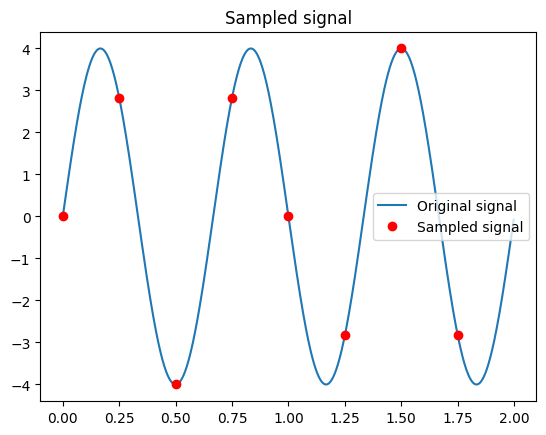

In [2]:
# Set sampling rate and duration of signal
f_s = 4
duration = 2
ns = np.arange(f_s * duration)

# Set freuqencies and amplitudes of the signal
F_0 = 1.5
A_0 = 1


# Create the signal
sign = 4*np.sin(2 * np.pi * F_0 * ns / f_s)

with np.printoptions(precision=3, suppress=True):
    print('Sampled signal is:', sign)


# Plot the signal in time domain
t = np.linspace(0, duration, 1000, endpoint=False)

plt.plot(t, 4*np.sin(2 * np.pi * F_0 * t))
plt.plot(ns/f_s, sign, 'ro')
plt.legend(['Original signal', 'Sampled signal'])
plt.title('Sampled signal')

# Calculate fourier coefficients manually
N = len(sign)
k = np.arange(N)
n = k.reshape((N, 1))
M = np.exp(-2j * np.pi * k * n / N)

# Set to change which fourier coefficient we are calculating for
k = 3
fourier_coefficient = np.sum(sign * np.exp(-2j * np.pi * k * ns / N))

# Calculate the fourier coefficient "The hard way"
f_k2 = sign[0] * np.exp(-2j * np.pi * k * 0 / N) + sign[1] * np.exp(-2j * np.pi * k * 1 / N) + sign[2] * np.exp(-2j * np.pi * k * 2 / N) + sign[3] * np.exp(-2j * np.pi * k * 3 / N) \
+ sign[4] * np.exp(-2j * np.pi * k * 4 / N) + sign[5] * np.exp(-2j * np.pi * k * 5 / N) + sign[6] * np.exp(-2j * np.pi * k * 6 / N) + sign[7] * np.exp(-2j * np.pi * k * 7 / N)

with np.printoptions(precision=3, suppress=True):
    print("The frequencies we can represent with the given sampling rate are:", (np.arange(N)*2 / f_s)[:N//2])
    print(f'Fourier coefficient for k = {k} is: {np.abs(f_k2):.2f}')

    F_k2 = (f_k2 / N) * 2

    print(f'And the amplitude of the corresponding frequency is: {np.abs(F_k2):.2f}')

    xf = fftfreq(N, 1/f_s)

    print(xf)

In [3]:
def generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    return wave

def calculate_fourier_coeffcients(signal_values, sample_rate=1, v=True):
    N = len(signal_values)
    coeffs = []

    # Calculate fourier coefficient for each frequency bin
    for k in range(N):
        # Create values to sum in order to obtain fourier coefficients
        prepared_to_sum = [x_n * np.exp(-2j * np.pi * k * n / N) for n, x_n in enumerate(signal_values)]
        coeffs.append(sum(prepared_to_sum))
        
        if v:
            frequency = ((k / N) * sample_rate)
            absolute_coefficient = np.absolute(coeffs[k]) # Get absolute value to remove imaginary parts
            print(f"The fourier coeffcient associated with frequency {frequency}: {absolute_coefficient:.3f}, or an amplitude of {(2 * absolute_coefficient / N):.3f}")
            if k == N / 2:
                print("############ Frequencies Loop ############")

    return coeffs

### Exercise 1.2

*Far easier it is to create Python functions that calculate the fourier coeffcients for us*

**1. The first of the above two functions generate a sine wave based on a series on input amplitudes, phases, frequencies, sample rates and a duration of the signal. The second should calculate the fourier coefficients of said sine wave. Complete the function to calculate the fourier coefficients.**

**Test your imlpementation using the cell below, you shuold get back the amplitudes associated with each frequency**

**2. Change the values of the sample rate, frequency, or duration to see if you can make a signal whose frequencies cannot be accurately represented by the fourier transform**

ANSWER: We can do a couple of nasty things, such as:

- Changing the frequencies to be too high for the sample rate (nyquist rate)
- Change the sample rate to be too low for the sample rate (again, nyquist rate)
- Change the duration to be too short to have adequate resolution to show low frequencies

**3. What do you think happens with the fourier coefficients when the signal contains a frequency that does not correspond to any of the frequency bins?**

ANSWER: The 'energy' contained in those frequencies that cannot is essentially thrown out to the remaining frequencies. Typically referred to as "aliasing" or "ghosting"

In [4]:
frequencies = [0.5, 2] # Change these for 1.2.2
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5 # Change this for 1.2.2
duration = 2 # Change this for 1.2.2

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 0.5: 2.500, or an amplitude of 0.500
The fourier coeffcient associated with frequency 1.0: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 1.5: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 2.0: 5.000, or an amplitude of 1.000
The fourier coeffcient associated with frequency 2.5: 0.000, or an amplitude of 0.000
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 3.0: 5.000, or an amplitude of 1.000
The fourier coeffcient associated with frequency 3.5: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 4.0: 0.000, or an amplitude of 0.000
The fourier coeffcient associated with frequency 4.5: 2.500, or an amplitude of 0.500


### Exercise 1.3

*In practice, simply being above the nyquist rate isn't everything you need to get the lower frequencies. The amount of samples also has an effect*

**1. Take a look at the below code, the fourier coefficient for the frequency 0.25 has not been found. Why is this?**

ANSWER: This is connected to exercise 1.2.2 and 1.2.3. The signal has a frequency of 0.25 and the duration is only 1. Remember that our resolution in the frequency domain (distance between frequencies), is essentially $\frac{1}{N} f_s$ in this case it is $\frac{1}{5} \cdot 5 = 1$, so too large to reprsent 0.25

Thinking further about this, it makes sense, we do not even have the time to observe a full cycle of the 0.25 wave $it takes 4 seconds to complete$, we need to sample for longer to achieve this

**2. How can you change the values of sample_rate and duration to alleviate this problem?**

ANSWER: Increase the number of samples, that is increase the duration in this case. Normally to get more samples we can either increase the duration **or** the sample rate, but in this case, increasing the sample rate would also decrease the resolution again, so we can only really increase the duration.

A duration of around 4 should do it, since then we have $$\frac{1}{20}\cdot 5  = \frac{1}{4} = 0.25$$, which is the frequency resolution we need to observe the freqeuncy $0.25$

**3. What would you say is a general rule of sampling when you need to recover both very high and very low frequencies?**

POSSIBLE ANSWER (NOT NECESSARY THE CORRECT ONE):

It is obvious that we should have high sample rates to recover high frequencies, because of the Nyquist rate and all that. But to recover low frequencies, we must make sure to sample the signal long enough that we observe the whole period. If we for example sample with 44100Hz for 1 second, we get 44100 samples, which might seem like a lot, but since we only sample for 1 second, we cannot fully observe a signal with a frequency of 0.25, for example.       

In [5]:
frequencies = [0.25, 2]
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5
duration = 1

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 1.328, or an amplitude of 0.531
The fourier coeffcient associated with frequency 1.0: 0.524, or an amplitude of 0.209
The fourier coeffcient associated with frequency 2.0: 2.434, or an amplitude of 0.974
The fourier coeffcient associated with frequency 3.0: 2.434, or an amplitude of 0.974
The fourier coeffcient associated with frequency 4.0: 0.524, or an amplitude of 0.209


## 2 - Properties of the fourier transform

*Two of the most touted properties of the fourier transform are arguably:*

1. It is linear, meaning $F(aX + bY) =  a\cdot F(X) + b \cdot F(Y)$
   1. This means, adding the scaled versions of signals in the time domain, equates to adding the scaled versions of their frequencies in the frequency domain
2. Convolutions in the time domain are multiplications in the frequency domain and vice versa, often written as  $f(x) * h(k) = F(X) \cdot H(X)$
   1. You need not know what this means specifically, but we will use it more next week

*We will just show the first in this exercise*

**$\star$ 1. Mathematically prove that the fourier transform (discrete case) is linear**

*Hint: Look at two different functions x and y, not different values of k*

ANSWER:

Here we start by writing up the condition of linearity:

$$F(ax + by)(k) \sum^{N-1}_{n = 0}(ax(n) + by(n)) e^{-i 2\pi \frac{kn}{N}}$$

We can then split up the sums:

$$= \sum^{N-1}_{n = 0}ax(n) e^{-i 2\pi \frac{kn}{N}} + \sum^{N-1}_{n = 0}by(n) e^{-i 2\pi \frac{kn}{N}}$$

Take the constants out

$$= a\sum^{N-1}_{n = 0}x(n) e^{-i 2\pi \frac{kn}{N}} + b\sum^{N-1}_{n = 0}y(n) e^{-i 2\pi \frac{kn}{N}}$$

And end up with what we sought

$$= aF(x)(k) + bF(y)(k)$$


**2. Show this condition of linearity by plotting what happens in the frequency domain when you add two scaled sine waves together. You can expand the cell below as a 'skeleton' for your code, or you can code it from scratch yourself**

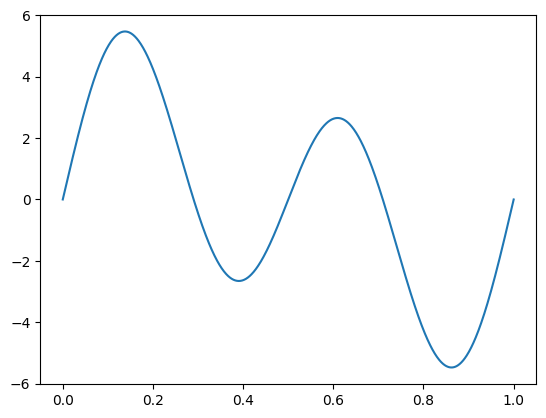

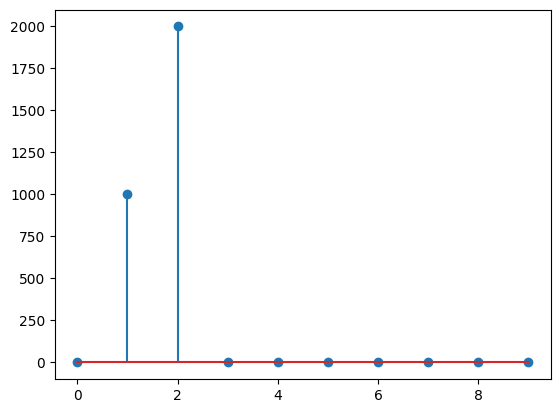

In [6]:
# Set duration of signal
duration = 1

# Set sample rate
sample_rate = 1000

# Create time values for signal
t = np.linspace(0, duration, int(sample_rate * duration))


# Define signals...
frequency_1 = 1
sine_wave_1 = np.sin(2 * np.pi * frequency_1 * t)

frequency_2 = 2
sine_wave_2 = np.sin(2 * np.pi * frequency_2 * t)

# Create linear combination of signals
a = 2
b = 4
signal_values = a*sine_wave_1 + b*sine_wave_2

# Get coefficients using previous fourier coefficients function
coeffs = np.abs(calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=False))


# Plot signal in time and frequency domain
plt.plot(t,signal_values)
plt.show()

plt.stem(coeffs[:10])
plt.show()

## 3 - Fourier transformations using packages

*As ML enthusiasts, we obviously never implement ourselves what the plebs have already done for us. In this case, scipy already has a rather good FFT implementation*

In [7]:
def sk_fourier_transform(time_signal, duration, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    # idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.stem(signal_freq_bins, (1.0 / N * np.abs(signal_freq)))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


### Exercise 3.1 

*Using the FFT functions from scipy isn't actually **that** simple*

**1. Complete the sk_fourier_transform function to get the fourier coefficients (yf) and the fourier frequency bins (xf) from a given time signal. If you're having trouble, be sure to look up documentation or examples online for this. Test your implementation using the cell below.**

**$\star$ 2. Change the plot_audio_signal function to only plot the positive frequencies, and get the wholly correct value of the amplitudes.**

**3. Test the implementation in cases where there are frequencies that do not fit into frequency bins, and in cases were aliasing is present. How does the fourier spectrum look.**

POSSIBLE ANSWER: The frequencies that do not fit in should be distributed amongst the remaining frequencies. Visually this can seem as 'fat line' of frequencies that are all really really low.

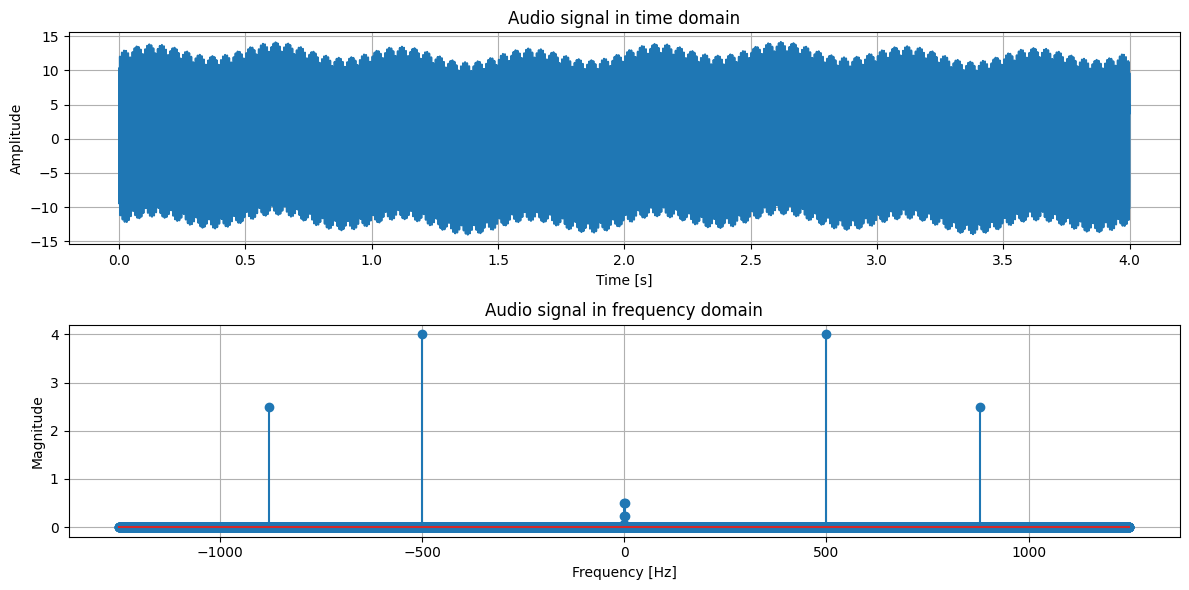

In [8]:
frequencies = [0.5, 2, 0.0005, 880, 7000]
amplitudes = [0.5, 1, 10, 5, 8]
phases = [0, 0, 0, 0, 0] 

sample_rate = 2500
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)

plot_audio_signal(t, time_signal, yf, xf, duration=duration)

### Exercise 3.2

*In real life, we never have noise-free observations, so it is useful to see how noise affects our final signal as well as the fourier spectrum. The below code introduces normal distributed noise to a given signal with the following, common model:*

$$y(n) = s_n + \eta_n  \text{ }|\text{ }  \eta_n \sim \mathcal{N}(0, \sigma)$$

*Where $s_n$ is our signal of interest, $\eta_n$ is the system noise and $y(n)$ is our observed signal*

**1. Complete the implementation to add noise to the observed time signal**

**2. How does the fourier spectrum change when noise is introduced? How are the noise 'frequencies' expressed. Why do you think this is the case?**

**POSSIBLE ANSWER** White noise is obviously completely different from timestep to timestep, so can appear as both very fast changes from one step to the next, or very slow moving tendencies. Really this means that it adds frequencies to the fourier spectrum that aren't really there. Really white noise is said to contain 'all frequencies'.

**3. Say you got an observed signal with noise as shown below, how could you approach removing the noise to only get the input frequencies out?**

POSSIBLE ANSWER: One (dreadfully simple) solution, is to just remove all frequencies with an amplitude below a certain level. The assumption here is that the signal of note is strong enough to cut through the noise. That means the "Signal to Noise ratio" is high. In situations where this is not the case, we typically need to know something about the statistics of the signal or the noise to say anything of a noised signal.

**3.1 Keeping in mind your idea for removing noise, how would increasing the variance of the noise impact this? Try increasing the variance of the noise and see what happens to the "noise frequencies" and the actual frequencies in the fourier spectrum**

POSSIBLE ANSWER: Increasing the variance of the noise means the noise has greater possibility of greater 'swings' at each timestep. Meaning the average impact on the signal will be higher. Thus more variance in the white noise, means we have a harder time discerning the actual signal. With amplitudes of around 2, and a noise variance of 4, the true signal already begins to wash out.

**$\star$ 3.2 The variance of the noise is often referred to as the "power" of the noise, why do you supose this is?**

POSSIBLE ANSWER: The **power** of a signal is considered as the average energy per time unit for a signal. In the discrete case, this is $P = \frac{1}{N}\sum^{N-1}_{n=0}|x(n)^2|$. For zero-mean white noise, this is exactly its variance, since $\text{Var}(n) = E[(n - E[n])^2]$ where we know that $E[n] = 0$ as it is zero-mean. Therefore the power of white noise is exactly its variance 

**$\star$ 4. Try changing the mean value of the noise from 0 to add a so called "DC component". What do you think this represents? How is it reflected in the fourier spectrum?**

POSSIBLE ANSWER: In this case, it would actually add an average value to the noise. Not one of note, since we could easily get rid of it if we knew it (and we can calculate it empirically quite easily!). It can come from a bunch of places if we have bad readings, or if we sample at exactly $2\cdot F$ for any frequency in our signal, it will appear as a DC component. Why it is called a DC component you need to ask more electrical engineering inclined people about.

It can be seen in the fourier spectrum as a spike at exactly 0

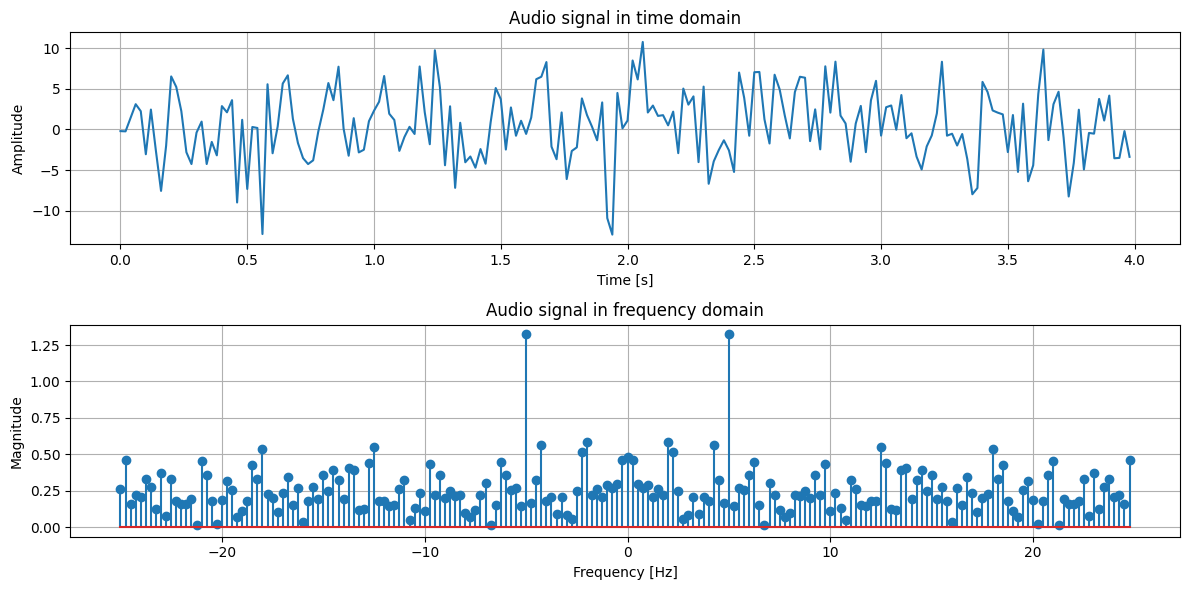

In [9]:
frequencies = [0.5, 2, 5]
amplitudes = [0.5, 1, 2]
phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

mean = 0 # Change this to introduce a 'dc component' to the noise
variance = 4 # Change this to increase the prescence of the noise

noise = np.random.normal(loc=mean, scale=variance, size=len(time_signal))       

noised_signal = time_signal + noise

xf, yf, t = sk_fourier_transform(noised_signal, duration, sample_rate)

plot_audio_signal(t, noised_signal, yf, xf, duration=duration)

### Exercise 3.3

*As previously mentioned, most of human speech is typically around the 90 - 3500 Hz range. It can be interesting to look at actual voice signals to see how they behave. The cell below loads one of four voice signals spelling out "S O F A"*

*We redefine fourier transform and plotting functions to work with loaded data*

1. *A clean signal where only the speech is present*
2. *A signal where white noise has been added in the background*
3. *A signal where non-white noise in the form of a fan has been added*
4. *A signal where non-white noise in the form of human speech has been added*

**1. Load the clean signal and see if you can recognize the difference between consonants and vowels in the time domain, what about the frequency domain?**

ANSWER: In general for speech, consonants will be a bit higher frequencies. This is especially a pain when dealing with filtering of speech signals, since consonants add a lot of meaning to speech, and are often the first to go if high-pass filters are applied

**2. Load the two different noised signals. How do the different types of noise stand out from one another?**

ANSWER: The talking noise is spread a lot more over the entire frequency domain, as opposed to the fan noise, which is almost entirely one frequency

**3. Play with the function mix_noise to mix different types of noise with the clean signal. What combinations of noise make the clean signal the most unintelligeble from an audio standpoint?**

POSSIBLE ANSWER: All of them. Looking after individual frequencies in signals in the time domain is typically a terrible idea, this is no different

**3.1 What combinations of noise make the clean signal the most unintelligeble when looking at just the plot of the time and frequency domain**

POSSIBLE ANSWER: The speech, no question. The fan noise could be filtered out extremely easily, by just removing the few frequencies it occupies. The white noise is more difficult, but we could use options discussed before, just removing low frequencies. The talking noise is far harder. Since it occupies the same frequency band as the signal (which is also talking), we cannot 'safely' remove the talking noise without possibly removing some of the signal.

This whole seperating different noise and signal types from one another is a whole can of worms called "source sepreation". If you want, you can read about a method called ICA (Independent Component Analysis), typically used for this purpose.

**4. In general, what types of the presented noise do you think are the most difficult to remove out when the clean signal is human speech?**

POSSIBLE ANSWER: In general, speech is hella hard to filter out. If you think about it, it makes sense. From a data and statistics viewpoint, "important" speech is almost exactly the same as "noise" speech. The only difference being perhaps the amplitude (which might not even be consistent), and the semantic content (which can be extremely difficult to deduce).

This field typically occupies the domain called "speech enhancement", which seeks to remove additive noise in speech signal to clarify them.

In [10]:
# Redefine fourier transform and plot functions because they don't really work when we have signals with set durations
def sk_fourier_transform(time_signal, t, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, time_signal.size / sample_rate, time_signal.size, endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None, max_freq=5000):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    if max_freq is not None and max_freq > 0:
        idx = idx[:max_freq]


    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins[idx], (2.0 / N * np.abs(signal_freq[idx])))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Sample rate is: 48000Hz


/tmp/ipykernel_9266/2859801324.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, noise_signal = read(noise_path)


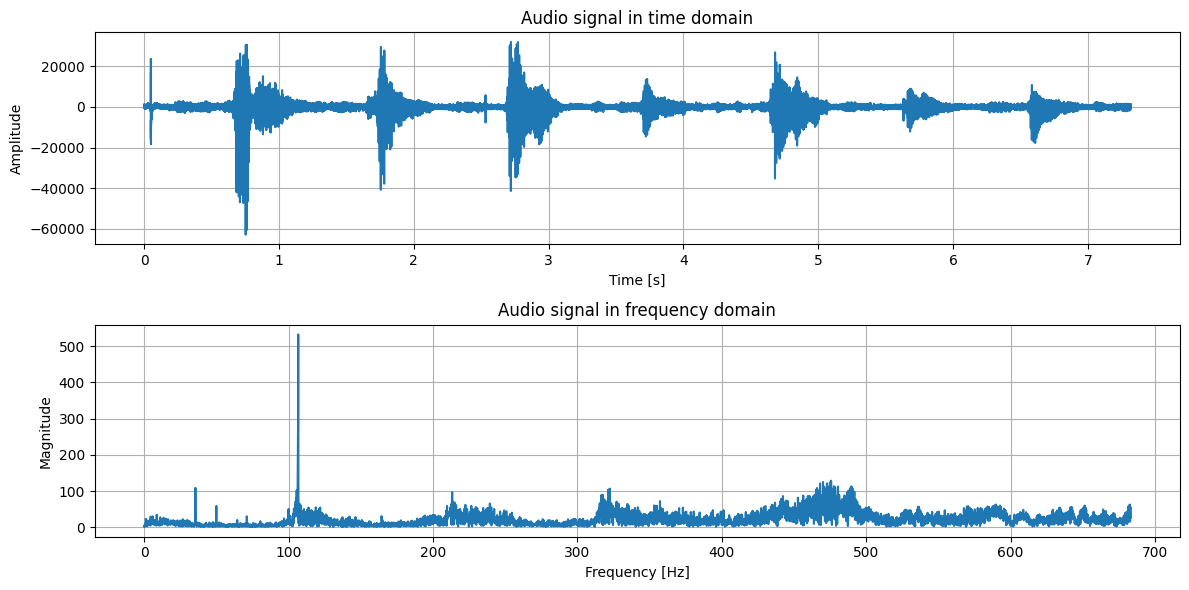

In [11]:
sofa_path = "audio/sofa.wav"
fan_noise_path = "noise_examples/fan_noise.wav"
talking_path = "noise_examples/talking.wav"

sample_rate, time_signal = read(sofa_path)
time_signal = 5 * np.array(time_signal[1:, 0],dtype=float)   # Indexed to make N odd


def mix_noise(observed_signal, noise_paths, noise_amplitudes, white_noise_variance=10, whtie_noise_mean=0, white_noise_amplitude=10):
    """
    Load and mix different white noise sources
    """
    observed_signal_copy = np.copy(observed_signal)

    for noise_path, noise_amplitude in zip(noise_paths, noise_amplitudes):
        _, noise_signal = read(noise_path)
        noise_signal = np.array(noise_signal[1:, 0],dtype=float)[: len(observed_signal_copy-1)]
        observed_signal_copy += noise_signal * noise_amplitude

    # Create and add white noise
    white_noise = np.random.normal(loc=whtie_noise_mean, scale=white_noise_variance, size=len(time_signal))
    observed_signal_copy += white_noise_amplitude * white_noise

    return observed_signal_copy


print(f"Sample rate is: {sample_rate}Hz")

time_signal = mix_noise(time_signal, [fan_noise_path, talking_path], [0.05, 0.05])

# Create fourier transform, plot signal
xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plot_audio_signal(t, time_signal, yf, xf, duration=duration, max_freq=5000)
Audio(time_signal,rate = sample_rate)



## 4 - Reflections on noise

### Exercise 4.1

*Noise is present everywhere, but can be circumvented in quite a few cases. The following questions are mostly discussion and reflection questions, there may not be a 'true answer'*

**1. Alice uses her phone to call Bob. Alice's phone signal occupies the frequency range 600MHz to 1GHz (somewhat normal for phones). Charlie is right next to Alice during her call, and is watching a Joe Rogan podcast using Wifi, which he recieves on the frequency band 2.4GHz to 5GHz.**

**1.1 Is the call between Alice and Bob in danger of being cut off? Why/Why not?**

ANSWER: No, not at all. Unlike humans, machines are not at all distracted by different frequencies, so long as all information is conatined within distinct bands. In this case, the phone call band of Alice does not touch the wifi band of Charlie. 

You can see it in sine waves as well. We can add two sine waves of two different frequencies, and still perfectly recover the original two sine waves. It is only when we mix frequencies, that it becomes a problem.

**1.2 Say Charlie *wants* to mess with Alice and Bob by interrupting their call. How could he go about this?**

POSSIBLE ANSWER: Charlie could find the biggest, baddest radio transciever he can get that functions in the same frequency band as Alice, hook it up to the biggest power source he can find, and then simply make a call to whomever. This would generate a signal in the same frequency range as Alice's call, but on a much higher amplitude. Charlie's "Noise" would therefore drown out Alice's call. This is often referred to as "Jamming", and is the signal equivalent of shouting right next to two people trying to have a conversation.

*Extra note*: Charlie would not be able to do this on the regular celluar network, since modern cellphones have **a heap** of technologies to prevent them from interfering with one another. This is why thousands of people can use their cellphones in the same place with little to no loss of quality. An example of such a technology is **channel multiplexing** and is quite interesting to read about if you have the time.

**2. Reflect on what can cause noise in the following scenarios:**

1. **Talking in a crowded room**
2. **A phone getting wifi signal in a crowded mall**
3. **An alien race sending a signal to earth so NASA can hear it.**

POSSIBLE ANSWERS:
1. Other people talking
2. The other people's phones
3. Pretty much everything in space. We don't know on what frequencies (or even which mediums) aliens usually transmit, so everything from the light of stars to radiation from black holes can influence the signal as noise.

**3. You are an engineer working for the well-known and respected military contractor, Suckheed Fartin (Skibidi Gyattin). Recently, the military has been having issues where nasty people have used radios to send mean messages to the pilots of fighter jets flying missions, this of course makes the pilots very sad, and the military wants a solution.**

**How would you, armed with your newfound knowledge of signal processing, go about solving the issue of these mean messages. For practical purposes, the pilots cannot turn off their radios or change the reciever frequencies on their radios**

POSSIBLE ANSWER: I see two possible solutions:

1. Using an active-noise-cancelling type strategy. Given that the pilots have probably heard enough insults at this point to know what they say, the jet radios can simply transmit the exact same waves as the ruffians' but phase-shifted 90 degrees. When two opposite waves meet, they cancel out.
2. Transmitting their own nasty words on the same channel, so the pilots cannot recieve the simply drowning out the noise. This, however, has the downside of also hitting whomever else is in the general area, and in a way, equates to turning your radio off for all but the most powerful transmitters. 

Fun fact: In the real world, military jets do exactly number two. Usually with radar waves instead of radio waves to prevent radars from accurately pinpointing their location.

# 5 - Filtering

As mentioned, filtering is rather easy enough, we are going to focus on just convolution, plotting filters and using filters in time and frequency domain. As a reminder, the formula for signal convolution is

$$y(k) = x(n) * h(n) = \sum^{\infty}_{n=-\infty} x(n) h(k - n)$$

## High-, low, and band-pass filtering

The most commonly used filters, are usually some variant of high-pass filters, low-pass filters and band-pass filters. They work in the following ways:

- **High-pass**: Let the high frequencies pass, meaning the result is a signal with only high frequencies
- **Low-pass**: Let the low frequencies pass, meaning the signal will only have low frequencies
- **Band-pass**: Let frequencies in a specific band (for example 400 to 800 Hz) pass, meaning the signal will only have those frequencies


### Exercise 5.1

*It is good thing to try at least one manual calculation of convolution with a filter, as terrible as it may sound...*

**1. Given the below values:**

$$x_n = \begin{cases} 
        \frac{1}{2} n  & \text{for} 0 \leq n \leq 6 \\
        0 & \text{elsewhere}
        \end{cases}
$$


$$h_n = \begin{cases} 
        1  & \text{for} -2 \leq n \leq 2 \\
        0 & \text{elsewhere}
        \end{cases}
$$

Calculate $y(k)$ as a of the convolution $x(k) * h(k)$ for $k = -1$, $k = 4$ and $k = 7$

ANSWER: This might seem trivial, but can be quite tricky given that we need to know where the signal and filter actually overlaps:

The $\dots$ indicate where we know either the filter, signal, or both, only have 0 values...

$$y(-1) = \sum^\infty_{n = -\infty}x(n) h(-1 - n) = \dots x(-1) \cdot h(-1 -(-1)) + x(0) \cdot h(-1 -0) + x(1) \cdot h(-1 -1) + x(2) \cdot h(-1 -2) + \dots = \frac{1}{2} \cdot 0 \cdot 1 + \frac{1}{2} \cdot 1 \cdot 1 + \frac{1}{2} \cdot 2 \cdot 0 = \frac{1}{2}$$

For $k = -1$, we see that we first are limited by the signal is 0 (at $x(-1)$) and later, that the filter is 0 (at $h(-3)$)

$$y(4) = \dots + x(1) \cdot h(4 - 1) + x(2) \cdot h(4 - 2) + x(3) \cdot h(4 - 3) + x(4) \cdot h(4 - 4) + x(5) \cdot h(4 - 5) + x(6) \cdot h(4 - 6) + x(7) \cdot h(4 - 7) + \dots = \frac{1}{2} \cdot 1 \cdot 0 + \frac{1}{2} \cdot 2 \cdot 1 + \frac{1}{2} \cdot 3 \cdot 1 + \frac{1}{2} \cdot 4 \cdot 1 + \frac{1}{2} \cdot 5 \cdot 1 + \frac{1}{2} \cdot 6 \cdot 1 + \frac{1}{2} \cdot 0 \cdot 0 = \frac{20}{2}$$

For $k = 4$, we see that both filter and signal stop at $n = 7$, since $x(7) = 0$ and h(4 - 7 = -3) = 0$

$$y(7) = \dots + x(4) \cdot h(7 - 4) + x(5) \cdot h(7 - 5) + x(6) \cdot h(7 - 6) + x(7) \cdot h(7 - 7) + \dots = \frac{1}{2} \cdot 4 \cdot 0 + \frac{1}{2} \cdot 5 \cdot 1 + \frac{1}{2} \cdot 6 \cdot 1 + \frac{1}{2} \cdot 0 \cdot 1 = \frac{11}{2}$$

Finally here, we see that the signal 'gives out' before the filter does.

In general, calculating convolutions manually is terrible, don't ever do it for real, but it is good enough to do it a few times just to get the hang of it, it can be really difficult otherwise.

### Exercise 5.2

*I meant to have an exercise centered around implementing your own convolution function to use a pre-made filter to do low-pass filtering... However that was prohibitively overcomplicated. Take that as a lesson, that if someone else has done it, it is probably better than what you can make yourself*

*That said, we still wanna 'get' filtering. Both manually and using packages. Below the functions butter_lowpass and butter_lospass_filter create a so-called [butterworth](https://en.wikipedia.org/wiki/Butterworth_filter) filter and apply it to a signal respectively.*

**1. Inspect the plots created by running the code two cells below. What are the visibile effects on time and frequency domain?**

ANSWER:

Time domain-wise, we can't really see much, some values are attenuated, some aren't. Frequency wise, we definately see that all above a certain point just disappear. This goes for both the positve and negative frequencies, as would be expected.

**2. Change the value of the frequency_cutoff, how does this change the plots and the resulting audio?**

ANSWER:

This should just change the point at which the frequencies on both sides cut off, so we get less area in the middle.

**$\star$ 3. The Butterworth filter is described as a 'maximally flat magnitude filter' what do you think this refers to. Why can we in actuality not just construct a completely flat filter?**

ANSWER: This is a bit of a tricky one, but the easy answer for an electrical engineer would be: "Physical constraints, lol"

In our case, as pseudo-mathematicians, it is more nuanced. The "ideal low-pass filter" has a $sinc$ function as its kernel. The sinc function is defined for all numbers on the real plane $\mathbb{R}$, so to use such a kernel on our data, we would need a kernel of infinite length... problematic

In the frequency doamin the problem is likewise: Here we can easily define our filter as just a cutoff, but unless we have infinite resolution of frequencies (meaning our fourier transform shows **all** frequency bins), not all values will be cut off, leading to some frequencies we want cut off surviving. The only way we can solve this is by having a time signal of infinite length... problematic

IN actuality, this is solved by having filters that "slope" on their way to the cut-off frequencies, as can be seen below. A better filter is usually seen as one with a steeper slope.

<img src="images/actual_filters.png" 
        style="display: block; margin: 0 auto" />




In [12]:
def butter_lowpass(cutoff, fs, order=5):
    """
    Create a butterworth lowpass filter, given a cutoff frequency and sampling rate
    """
    # Nyquist rate
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    # Use scipy to get butter filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Create and apply a butterworth lowpass filter to a signal
    """
    # Create lowpass filter using afforementioned function
    b, a = butter_lowpass(cutoff, fs, order=order)
    # Apply filter using filtfilt function
    y = filtfilt(b, a, data)
    return y

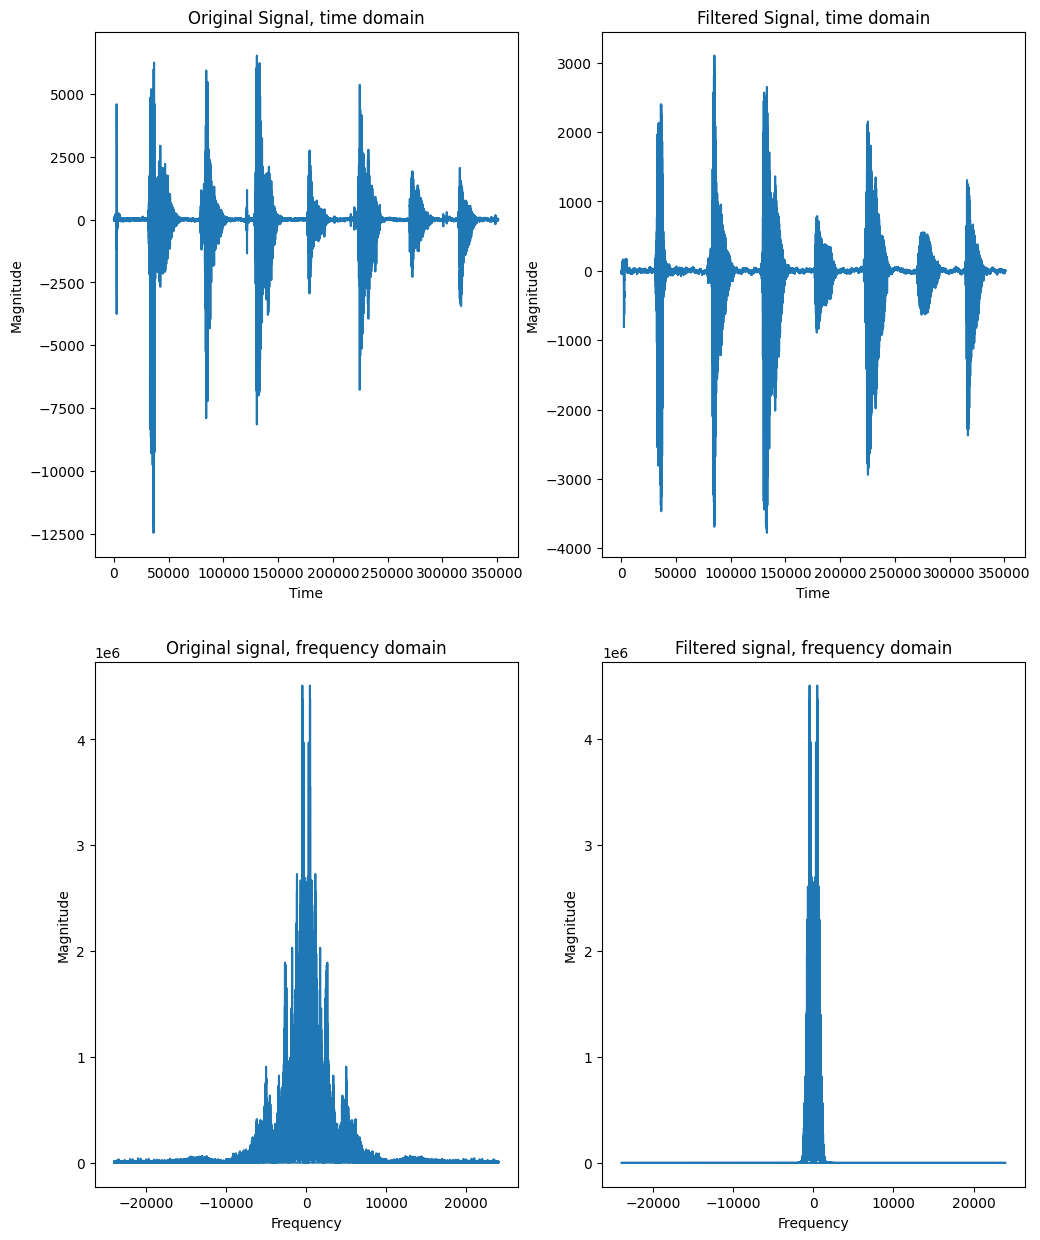

In [13]:
# Read sofa example, same as before
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Filter time signal using butter lowpass filter, only let frequencies of frequency_cutoff pass
frequency_cutoff = 1000
filtered_signal = butter_lowpass_filter(time_signal, 1000, fs=sample_rate, order= 5)

fig, axs = plt.subplots(2, 2, figsize=(12, 15))

# Plot the original signal in the time domain
axs[0, 0].plot(np.arange(len(time_signal)), time_signal)
axs[0, 0].set_title('Original Signal, time domain')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Magnitude')

# Plot the filtered signal in the time domain
axs[0, 1].plot(np.arange(len(filtered_signal)), filtered_signal)
axs[0, 1].set_title('Filtered Signal, time domain')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Magnitude')

# Obtain freqeuncy domain
xf = fftfreq(len(time_signal), 1 / sample_rate)
yf_original = np.abs(fft(time_signal))
yf_filtered = np.abs(fft(filtered_signal))

# Plot the original signal in the frequency domain
axs[1, 0].plot(xf, yf_original)
axs[1, 0].set_title('Original signal, frequency domain')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Magnitude')

# Plot the filtered signal in the frequency domain
axs[1, 1].plot(xf, yf_filtered)
axs[1, 1].set_title('Filtered signal, frequency domain')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')


Audio(filtered_signal, rate = sample_rate)


### $\star$ Exercise 5.3

*Below we implement filtering manually, which can be scary. We do this in two ways: One is simply multiplying the values in the frequency spectrum. The other is using the filter from the aforementioned method to convolve the signal in time domain. This avoids the somewhat more stringent math of creating filters in the time domain.*

**1. Complete the code to perform filtering in the frequency domain** 

**2. Inspect the plots of the filtering code. Determine what kind of filter it is by looking at its impulse response, as well as the fourier spectrum of the filtered signal**

ANSWER: It is a lowpass filter.

**3. Change the type of the filter by changing the cutoff_freq parameter. Try to make a high-pass filter and a band-pass filter. Listen to the resulting audio from both these**

**$\star \star$ 4. As mentioned, we can also filter in the time domain. Do so using the apply_convolution function and answer the following questions:**

1. What do we use the IFFT for?
2. Why do we use np.roll?
3. What is the result of the convolution compared to frequency domain filtering?

ANSWER:

1. The IFFT is used to get the filter in time domain. Remember we create the filter in the frequency domian by simply cutting off certain frequencies. We then transform this to an actual kernel by using the inverse fourier transform to take it back to the time domain.

2. np.roll is used to phase-shift the signal after convolution. When applying a high- or a low-pass filter, a time shift to the outputs is also applied. Usually when we talk about the **impulse response** of a filter (or the **freqeuncy response** if we fourier transform a filter), we are really only interested in the **magnitude response**, meaning how much the magnitude of each frequency shifts when we apply the filter. However, there is technically also a given **phase response**, which determines how much each frequency is shifted. In the case of our high- and low-pass filters, this is a **linear phase response**, meaning all frequencies are shifted by the same amount, which is rather low. Really the phase shift is mostly a result of the impulse respones of the kernel not being centered around the middle of the signal, there is another (trivial) phase shift introduces by the filter by itself. np.roll therefore, centers the impulse response of the filter so it is in the middle, rather than one at each end of signal.

In some cases, the phase response of a filter can have a **non-linear phase response** as you can probably guess, this is really freaking terrible, since if you use the ifft to back the original signal, it won't sound the same since the frequencies don't match up. Luckily some methods have been developed to counter this, including **predictive filters** (one example beinge [kalman filters](https://en.wikipedia.org/wiki/Kalman_filter)) that do not have a phase response, or [Vocoders](https://en.wikipedia.org/wiki/Vocoder) or [Neural vocoders](https://en.wikipedia.org/wiki/Deep_learning_speech_synthesis), that to a degree, synthesize normal speech from segments that don't otherwise match in phase.

3. The result of the convolution should be exactly the same the frequency domain filtering, barring perhaps small calculation errors and the aforementioned phase response. **Convolution in the time domain is the same as multiplication in the frequency domain**

In [14]:
def frequency_domain_filtering(time_signal : np.ndarray, sample_rate : int, cutoff_freq : list):
    """
    Filter a signal by multiplying its fourier transform with specific values
    Args:
        time_signal (np.ndarray): input time-domain signal
        sample_rate (int): sampling rate of the signal
        cutoff_freq (list): list of [low_cutoff, high_cutoff] frequencies
    """

    # Get fourier transform and fourier bins
    yf = fft(time_signal)
    xf = fftfreq(len(time_signal), 1 / sample_rate)

    # Find the index corresponding to the cutoff frequencies
    idx_lowpass = np.argmin(np.abs(xf - cutoff_freq[0])) if cutoff_freq[0] > 0 else 0
    idx_highpass = np.argmin(np.abs(xf - cutoff_freq[1])) if cutoff_freq[1] > 0 else len(xf) // 2 + 1

    # Create a frequency mask (both positive and negative frequencies are included)
    frequency_mask = np.zeros(len(xf))
    frequency_mask[idx_lowpass:idx_highpass] = 1
    frequency_mask[-idx_highpass:-idx_lowpass if cutoff_freq[0] > 0 else len(xf)] = 1  # Handle negative frequencies as well
    
    # Apply the frequency mask to the Fourier transform
    yf_filtered = yf * frequency_mask
    
    # Perform inverse Fourier transform to get filtered time-domain signal
    filtered_signal = np.real(np.fft.ifft(yf_filtered))

    return filtered_signal, frequency_mask

def apply_convolution(time_signal: np.ndarray, frequency_mask: np.ndarray):
    """
    Apply convolution using a filter kernel obtained from inverse FFT of the frequency mask.
    Args:
        time_signal (np.ndarray): Original time-domain signal.
        frequency_mask (np.ndarray): Frequency mask used in the filtering process.
    Returns:
        convolved_signal (np.ndarray): Signal after applying convolution.
    """

    # Obtain the filter kernel by inverse Fourier transform of the frequency mask
    filter_kernel = np.real(ifft(frequency_mask))
    
    # Shift kernel to be centered (necessary since the kernel is symmetric)
    filter_kernel = np.roll(filter_kernel, len(filter_kernel) // 2)

    # Perform convolution with the time signal (if using convolution methods, don't use your own, use scipy's (it's faster))
    convolved_signal = convolve(time_signal, filter_kernel, mode='same')

    return convolved_signal, filter_kernel



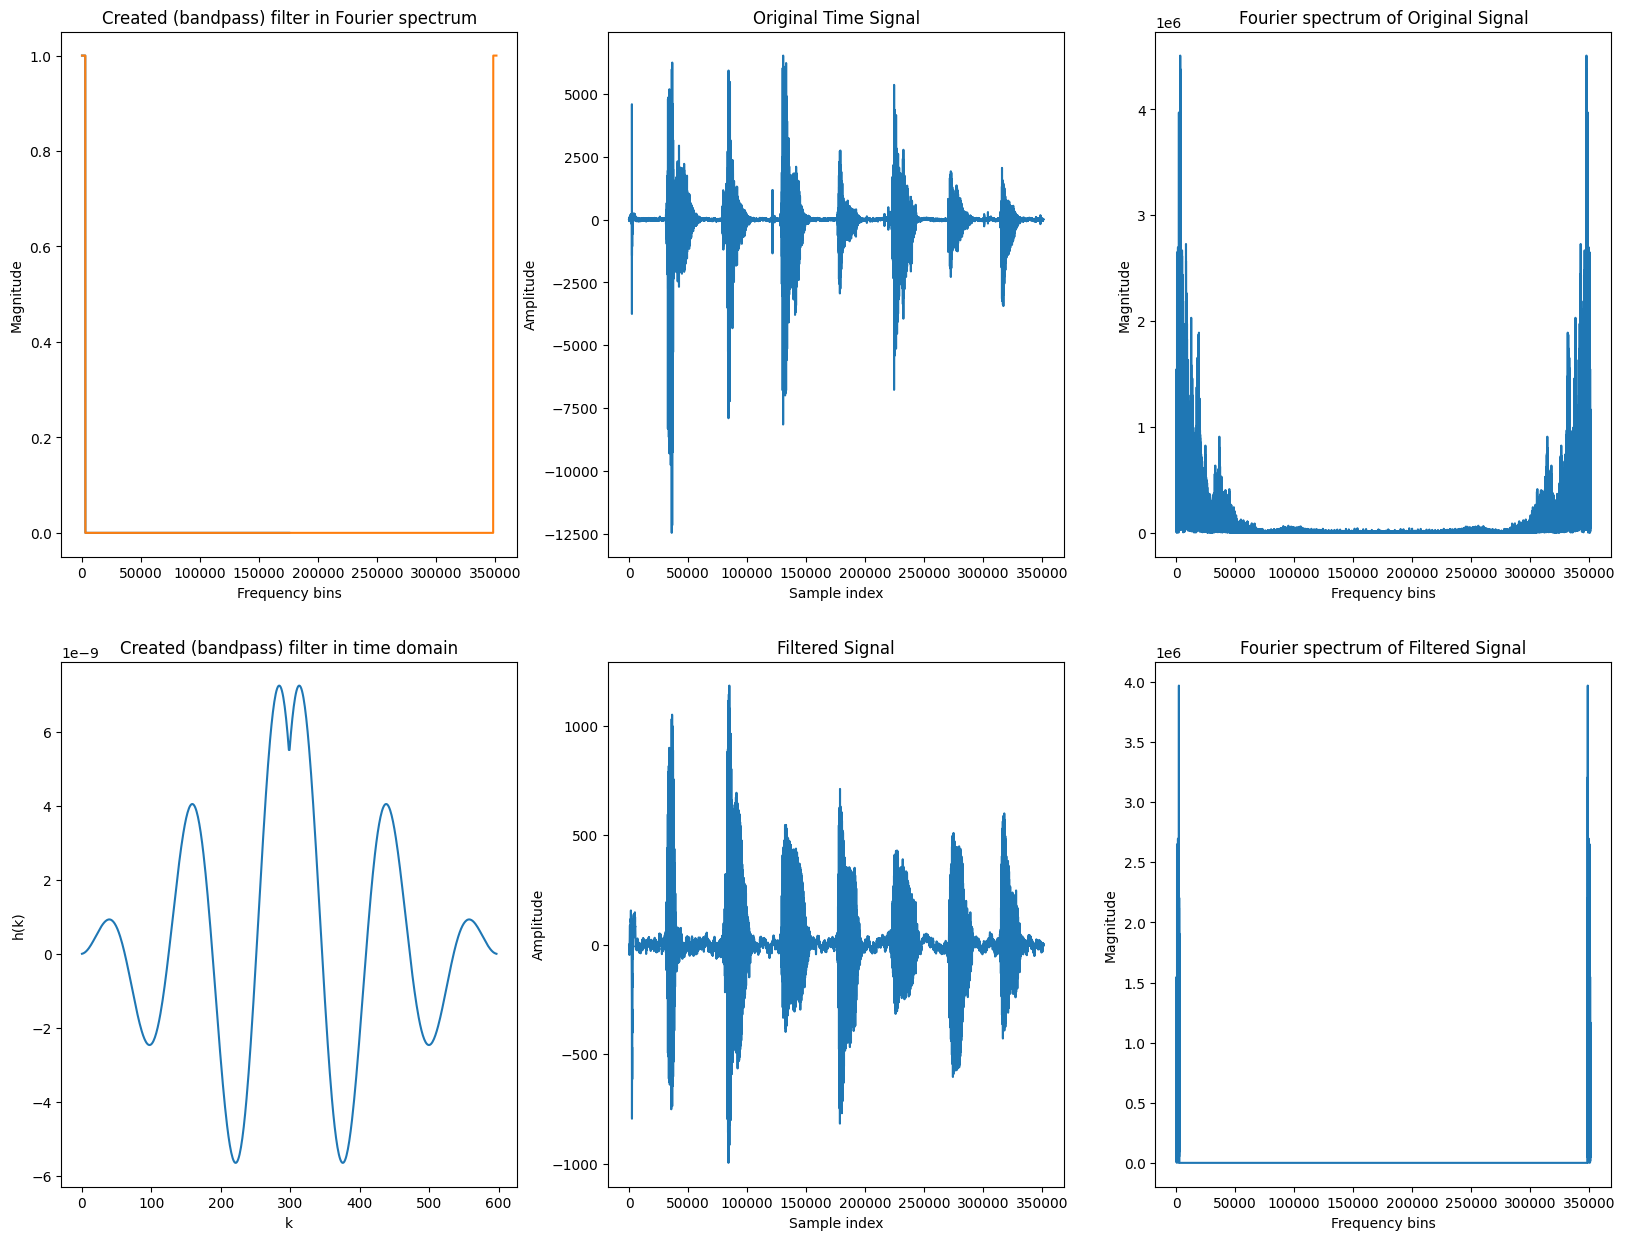

In [15]:
# Load audio same as before...
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Filter the signal in frequency domain
filtered_signal, frequency_mask = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[0, 380])

# Filter signal in time domain
convolved_signal, time_filter = apply_convolution(time_signal, frequency_mask)

# Obtain the FFT of the original and filtered signals respectively
original_freq_domain = np.abs(fft(time_signal))
filtered_freq_domain = np.abs(fft(filtered_signal))


############## PLOTTING ##############

# Create a 3x2 subplot layout
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Plot the filter kernel in frequency domain
axs[0, 0].plot(np.arange(len(frequency_mask[:len(frequency_mask) // 2])), frequency_mask[:len(frequency_mask) // 2])
axs[0, 0].plot(frequency_mask)
axs[0, 0].set_title('Created (bandpass) filter in Fourier spectrum')
axs[0, 0].set_xlabel('Frequency bins')
axs[0, 0].set_ylabel('Magnitude')

# Plot filter in time domain
# time_filter_limited = time_filter[len(time_filter) // 2 - 250: len(time_filter) // 2 + 250] # If you want to see the middle of the filter
# Get the first 300 and last 300 indices of the time filter
first = time_filter[1:300]
last = time_filter[-300:-1]
time_filter_limited = np.concatenate((first, last))
axs[1, 0].plot(np.arange(len(time_filter_limited)), time_filter_limited)
axs[1, 0].set_title('Created (bandpass) filter in time domain')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('h(k)')

# Plot the original time signal
axs[0, 1].plot(np.arange(len(time_signal)), time_signal)
axs[0, 1].set_title('Original Time Signal')
axs[0, 1].set_xlabel('Sample index')
axs[0, 1].set_ylabel('Amplitude')

# Plot the convolved signal
axs[1, 1].plot(np.arange(len(filtered_signal)), filtered_signal)
axs[1, 1].set_title('Filtered Signal')
axs[1, 1].set_xlabel('Sample index')
axs[1, 1].set_ylabel('Amplitude')

# Plot the Fourier domain of the original signal
axs[0, 2].plot(np.arange(len(original_freq_domain)), original_freq_domain)
axs[0, 2].set_title('Fourier spectrum of Original Signal')
axs[0, 2].set_xlabel('Frequency bins')
axs[0, 2].set_ylabel('Magnitude')

# Plot the Fourier domain of the filtered signal
axs[1, 2].plot(np.arange(len(filtered_freq_domain)), filtered_freq_domain)
axs[1, 2].set_title('Fourier spectrum of Filtered Signal')
axs[1, 2].set_xlabel('Frequency bins')
axs[1, 2].set_ylabel('Magnitude')

# Display the audio created
Audio(filtered_signal, rate = sample_rate)

## Exercise 6 - The Short-Time Fourier transform



*There is something called the short time fourier transform (STFT). What this does is split a time signal into a bunch of smaller time intervals, and computes the fourier transform for each smaller interval. Laying all of these FT's in series produces what is known as a spectogram, which you may have already know from Intro to Intelligent systems*

**1. Why would you do this?**

The answer can vary, but the main reason is in use for signals where the frequency content can change quickly. Take for example human speech where the frequency content can change widely depending on what is being said.

Another example (that I am currently working on), is when you have a signal that has been filtered with an unknown signal and need to unfilter it. The STFT lets you amplify or attentuate frequencies on specific timesteps, rather than frequencies over the entire time domain. This lets you have much greater dergree of granularity when doing inverse problems such as that.


**2. How do you implement this?**

Shown below. You need a few more parameters that the regular FT, most of which determine how the different time segments overlap. The 'window' parameter is a kind of filter that determines how one or more time segments overlap, while the nperseg is how many time units is used for each segment. A larger number creates a more 'mean value' for each segment and has smoother transitions, as well as being faster, while a smaller value gives greater granularity in what the frequency content is at a specific timestep, but can vary more and is slower.


**3. What extra things do you do to make the spectogram look nice?**

A bunch. I'm not an audio engineer or anything like that, but it includes these changes to make the spectogram more "visually appealing", including:

- Thresholding the frequency magnitudes by the n'th percentile to remove unecessary frequencies which could otherwise "pollute" the plots
- Converting the magnitude of the FFT to dB (by multiplying by 20 and taking log10)
- Smoothing the dB values using a gaussian filter to just make them less "janky"


**Just to reiterate: YOU DO NOT NEED TO UNDERSTAND BELOW CODE!!! It's mostly (boring) plotting stuff, some of it made by chatgpt and such**

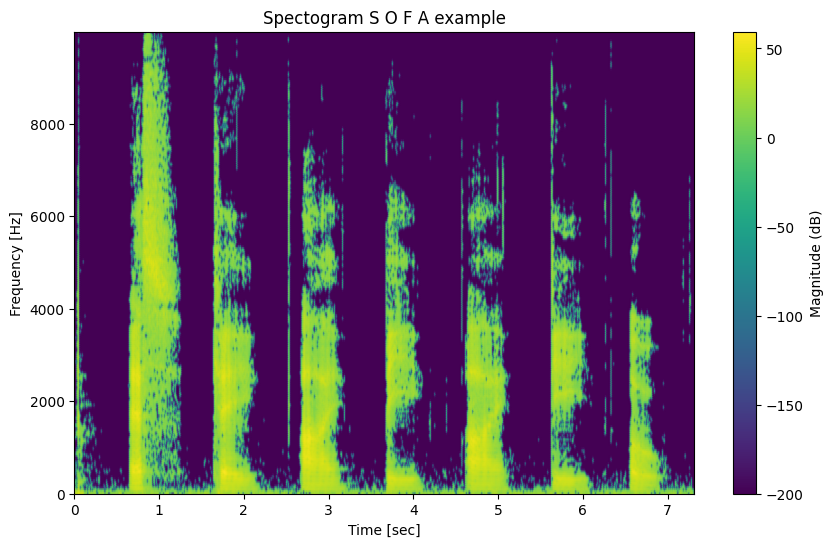

In [16]:
def plot_stft(time_signal, sample_rate, max_freq=10000,
                smooth=True, convert_to_db=True, 
                threshold=75, title=None):
    
    # Perform STFT
    f, t, Zxx = stft(time_signal, fs=sample_rate, nperseg=1024,  window='hamming')

    # Filter out the frequencies above the desired range
    freq_mask = f <= max_freq
    f_filtered = f[freq_mask]
    Zxx_filtered = Zxx[freq_mask, :]

    Zxx_magnitude = np.abs(Zxx_filtered)
    
    if threshold: # If trehsold is set, remove all values below the (to reinforce the most important parts of the signal)
        threshold = np.percentile(Zxx_magnitude, 75)
        Zxx_magnitude[Zxx_magnitude < threshold] = 0
    
    if convert_to_db:
        Zxx_magnitude_db = 20 * np.log10(Zxx_magnitude + 1e-10)  # Add a small epsilon to avoid log(0)
        
    else:
        Zxx_magnitude_db = Zxx_magnitude

    if smooth: # Smoothing to make the plot more visually appealing
        from scipy.ndimage import gaussian_filter
        Zxx_magnitude_db = gaussian_filter(Zxx_magnitude_db, sigma=0.5)

    # Plot the spectrogram, here we use pcolormesh, since there is tehnically like three axes
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f_filtered, Zxx_magnitude_db, shading='gouraud')
    if not title:
        plt.title('Spectrogram of the Audio Signal')
    else:
        plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude (dB)')
    plt.show()


    return time_signal, sample_rate

def load_file_and_plot_stft(file_path, start_duration=None, **kwargs):  
    """
    Just a convenience function to load a file *and* plot the stft of it
    """
    sample_rate, time_signal = read(file_path)

    if start_duration:
        time_signal = time_signal[start_duration[0]*sample_rate: start_duration[0]*sample_rate +  start_duration[1]*sample_rate]

    # Pre-process time signal
    time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd


    time_signal, sample_rate = plot_stft(time_signal, sample_rate, **kwargs)
    return time_signal, sample_rate

_ = load_file_and_plot_stft('audio/sofa.wav', title='Spectogram S O F A example')


### Exercise 6.1 

*STFT and filtering is often used together. Here we play around with different types of filtering*

**1. Use both low-pass and high-pass on the sofa example before and plot the STFT**

**$\star$ 2. Plot the STFT for one the noised sofa examples and see if you can clean the STFT somewhat using filtering, or by changing the settings of the STFT plot (such as threshold). Specifically see if you can solve the following problems:**

1. Remove (most) of the fan noise using a high-pass filter
2. Remove (most) of the white noise using low-pass filter
3. Try (and no doubt fail) to remove some of the talking noise using whatever filter you feel would be appropriate


/tmp/ipykernel_9266/2859801324.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, noise_signal = read(noise_path)


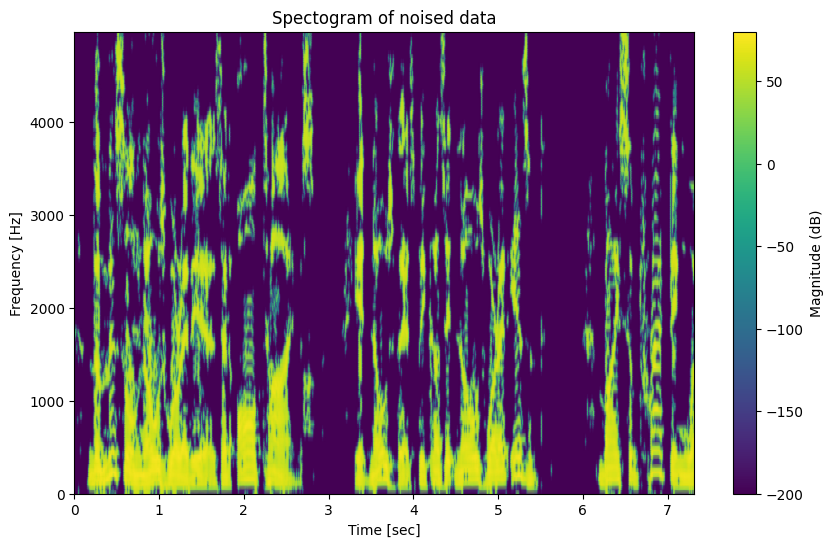

In [17]:
# Load audio same as before...
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

fan_noised_signal = mix_noise(observed_signal=time_signal, noise_paths=[fan_noise_path, talking_path], noise_amplitudes=[0.5, 0], white_noise_amplitude=0)
# 1. - Fan frequencies are at around 110 Hz and 250 Hz, so we just use high pass by only letting above 250 pass - it doesn't do a "good" job, but it's ok
fan_filtered_noised_signal, _ = frequency_domain_filtering(fan_noised_signal, sample_rate, cutoff_freq=[250, 0])

white_noised_signal = mix_noise(observed_signal=time_signal, noise_paths=[fan_noise_path, talking_path], noise_amplitudes=[0, 0], white_noise_amplitude=50)
# 2 - Speech frequencies appear to stop after around 5000 hz, we cut that off and hope for the best
white_filtered_noised_signal, _ = frequency_domain_filtering(white_noised_signal, sample_rate, cutoff_freq=[0, 5000])

speech_noised_signal = mix_noise(observed_signal=time_signal, noise_paths=[fan_noise_path, talking_path], noise_amplitudes=[0, 1], white_noise_amplitude=0)
# Honestly, I've no idea how to do this... just let 1000 to 2000 hz pass?
speech_filtered_noised_signal, _ = frequency_domain_filtering(speech_noised_signal, sample_rate, cutoff_freq=[1000, 2000])


# Plot and play audio
plot_stft(speech_noised_signal, sample_rate, max_freq=5000, smooth=True, convert_to_db=True, threshold=75, title="Spectogram of noised data")
Audio(speech_filtered_noised_signal, rate = sample_rate)


### Exercise 6.2 (Easy)

**Having such a "clean" audio where there is almost no sound in many places is a big boring to look at, having for example a music clip might be more interesting...**

**Here is where the exercises end. If you want, I've collected a bunch of different examples of sound in the extra_spectograms folder that I think would be interesting to see both the spectogram of, if not also the fourier transform and the time domain signal. You can plot them using the below code if you want**

**Note, you can change the 'max_freq' if you want to see higher frequencies or want greater resolution on the lower frequencies.**

**If you want, you can also play around with the filters from before to see if you can get truly cursed stft's or audio...**

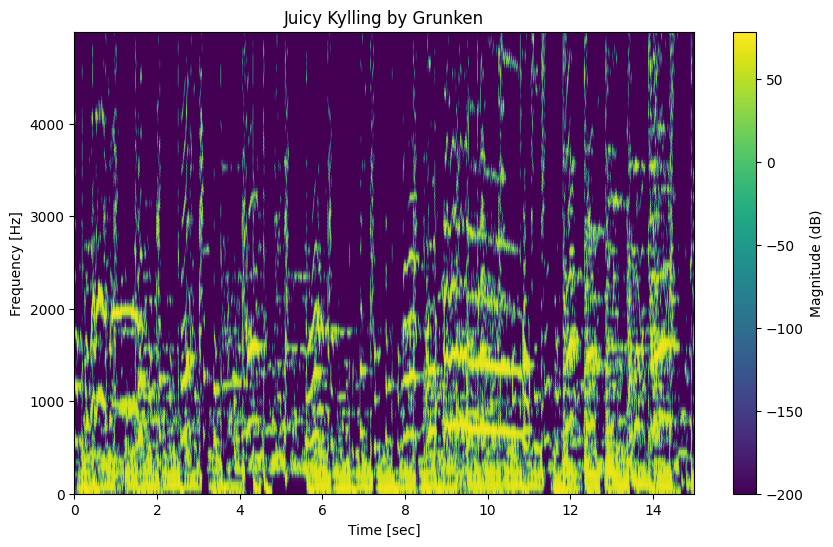

In [30]:
# Typical examples of young-people music

import titles

time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/good_music.wav", max_freq=5000, start_duration=[30, 15], title=titles.all_titles[0])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/hutcher.wav", max_freq=5000, title=titles.all_titles[1])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/broken.wav", max_freq=5000, title=titles.all_titles[2])

# A bass singer (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_singer.wav", max_freq=5000, title=titles.all_titles[3])

# A tenor singer (high pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/tenor_singer.wav", max_freq=5000, title=titles.all_titles[4])

# A guitar solo (medium pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/guitar_solo.wav", max_freq=10000, title=titles.all_titles[5])

# A bass solo (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_solo.wav", max_freq=5000, title=titles.all_titles[6])
# A songbird (perhaps distortion)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/songbird.wav", max_freq=5000, title=titles.all_titles[7])

# A human songbird (????)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/human_songbird.wav", max_freq=5000, title=titles.all_titles[8])

# A bunch of people talking at the same time
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/people_talking.wav", max_freq=5000, title=titles.all_titles[9])


# Optionally apply some filtering here
# time_signal, frequency_mask = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[2000, 4000])

# If you want to play the audio
Audio(time_signal,rate = sample_rate)


An experiment in bass-boosting...

Gracefully inspired by this guy: https://github.com/paarthmadan/bass-boost


In [19]:


import numpy as np
import scipy.io.wavfile as wav
import os
import math

attenuate_db = 0
accentuate_db = 5

def bass_line_freq(track):
    sample_track = np.array(track)

    # c-value
    est_mean = np.mean(sample_track)

    # a-value
    est_std = 3 * np.std(sample_track) / (math.sqrt(2))

    bass_factor = int(round((est_std - est_mean) * 0.005))

    return bass_factor

def apply_gain(signal, gain_db):
    # Convert from decibels to linear scale
    gain_factor = 10 ** (gain_db / 20)
    return signal * gain_factor

def low_pass_filter(signal, cutoff_freq, sample_rate):
    from scipy.signal import butter, lfilter

    # Design a low-pass Butterworth filter
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)

    # Apply the filter to the signal
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

def bass_boost_time_signal(time_signal, attenuate_db, accentuate_db):
    bass_cutoff = bass_line_freq(audio_data)

    # Apply low-pass filter for bass boost
    filtered_data = low_pass_filter(audio_data, bass_cutoff, sample_rate)

    # Apply gain to the original and filtered signals
    attenuated_signal = apply_gain(audio_data, -attenuate_db)
    boosted_filtered_signal = apply_gain(filtered_data, accentuate_db)

    # Mix the signals (overlay)
    combined_signal = attenuated_signal + boosted_filtered_signal

    # Ensure the combined signal doesn't exceed allowed range for int16
    combined_signal = np.clip(combined_signal, -32768, 32767)

    # Save the output as a new wav file
    output_filename = os.path.join(filename.replace(".wav", "") + "-bass-boosted.wav")
    wav.write(output_filename, sample_rate, combined_signal.astype(np.int16))
    return combined_signal



filename = 'extra_spectograms/bass_solo.wav'
sample_rate, audio_data = wav.read(filename)

# Ensure audio data is in the right format (2 channels or 1)
if len(audio_data.shape) == 2:
    audio_data = audio_data.mean(axis=1)  # Convert stereo to mono


bass_boosted = bass_boost_time_signal(audio_data, attenuate_db, accentuate_db)    

time_signal, sample_rate = load_file_and_plot_stft(f"{filename[:-4]}-bass-boosted.wav", max_freq=5000, load=[bass_boosted, sample_rate])


# An alternative way of plotting the spectogram, might be better, but does not contain correct frequencies since these are scaled by a different time unit
xf, yf, t = sk_fourier_transform(bass_boosted, duration, sample_rate)
plt.specgram(bass_boosted, Fs=sample_rate, NFFT=256, ) 
plt.show()

Audio(bass_boosted, rate=sample_rate)


/tmp/ipykernel_9266/683955465.py:63: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wav.read(filename)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed